In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import math


file1 = pd.ExcelFile("../../maleB30data/B30-male-R2.xlsx")

sheet_df1 = file1.parse(file1.sheet_names, header=None)

#cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names

cannel_start = 10
cannel_end = 5

time_leng = 1
pattern_leng = 5
#count_data

#ファイル1のデータカウント
pattern_dict1 = {}
sumpsth = 0
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    #print(sheet_df1[i].columns[0], i)
    #print(sheet_df1[i].head(10))
    #print(sheet_df1[i][1][1])
    if(sheet_df1[i].empty):
        print(name)
        break
    start_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][0]) +cannel_start
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1]) - cannel_end
    sig1 = (sheet_df1[i]['Unnamed: 3'][start_number : end_number]).values
    sig1 = sig1.astype("int")
    #print(len(sig1))
    sig1 = np.trim_zeros(sig1)
#        print()
    leng = len(sig1)
    psth = np.zeros(int((leng/time_leng)+1), dtype=np.int)
    l = 0
    for k in range(0, leng, time_leng) :
        psth[l] = sig1[k : k+time_leng].sum()
        l += 1
#        print(sig1[len(psth)-1])
    if(len(psth) > pattern_leng) : 
        for k in range(len(psth) - pattern_leng +1) :   # PSTHデータからはパターンを重ねて検索している
            if (str(psth[k : k + pattern_leng]) in pattern_dict1) : 
                pattern_dict1[str(psth[k : k + pattern_leng])] += 1
            else : 
                pattern_dict1[str(psth[k : k + pattern_leng])] = 1
        sumpsth += (len(psth) -pattern_leng+1)
print("end")

Sheet26
end


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import math


file1 = pd.read_csv("/home/nodoka/win2/data2.0/jensen/female-25000/B31-HR/tamesi/count_data.csv", header=None)
print(file1.columns)
print(len(file1.columns))
#print(len(file1.index))
#print(file1.columns.tolist())
#print(file1[[5]][:20])
#file1 = file1.values
#print_probability1 = file1[[5]][:20]
#print_probability2 = file1[[6]][:20]
#print_pattern = file1[[2]][:20]
print_probability1 = np.ravel(file1[[5]][:20].values)
print_probability2 = np.ravel(file1[[6]][:20].values)
print_pattern = np.ravel(file1[[2]][:20].values)
#print_probability1 = file1[[5]][:20].values.tolist()
#print_probability2 = file1[[6]][:20].values.tolist()
#print_pattern = file1[[2]][:20].values.tolist()
print(print_probability1)
print(type(print_probability1))
#print(file1)

#print(file1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')
8
[0.00062383 0.00062383 0.00062383 0.00062383 0.00062383 0.00062383
 0.00062383 0.00062383 0.00062383 0.00062383 0.00062383 0.00062383
 0.00062383 0.00062383 0.00062383 0.00062383 0.00062383 0.00062383
 0.00062383 0.00062383]
<class 'numpy.ndarray'>


[]

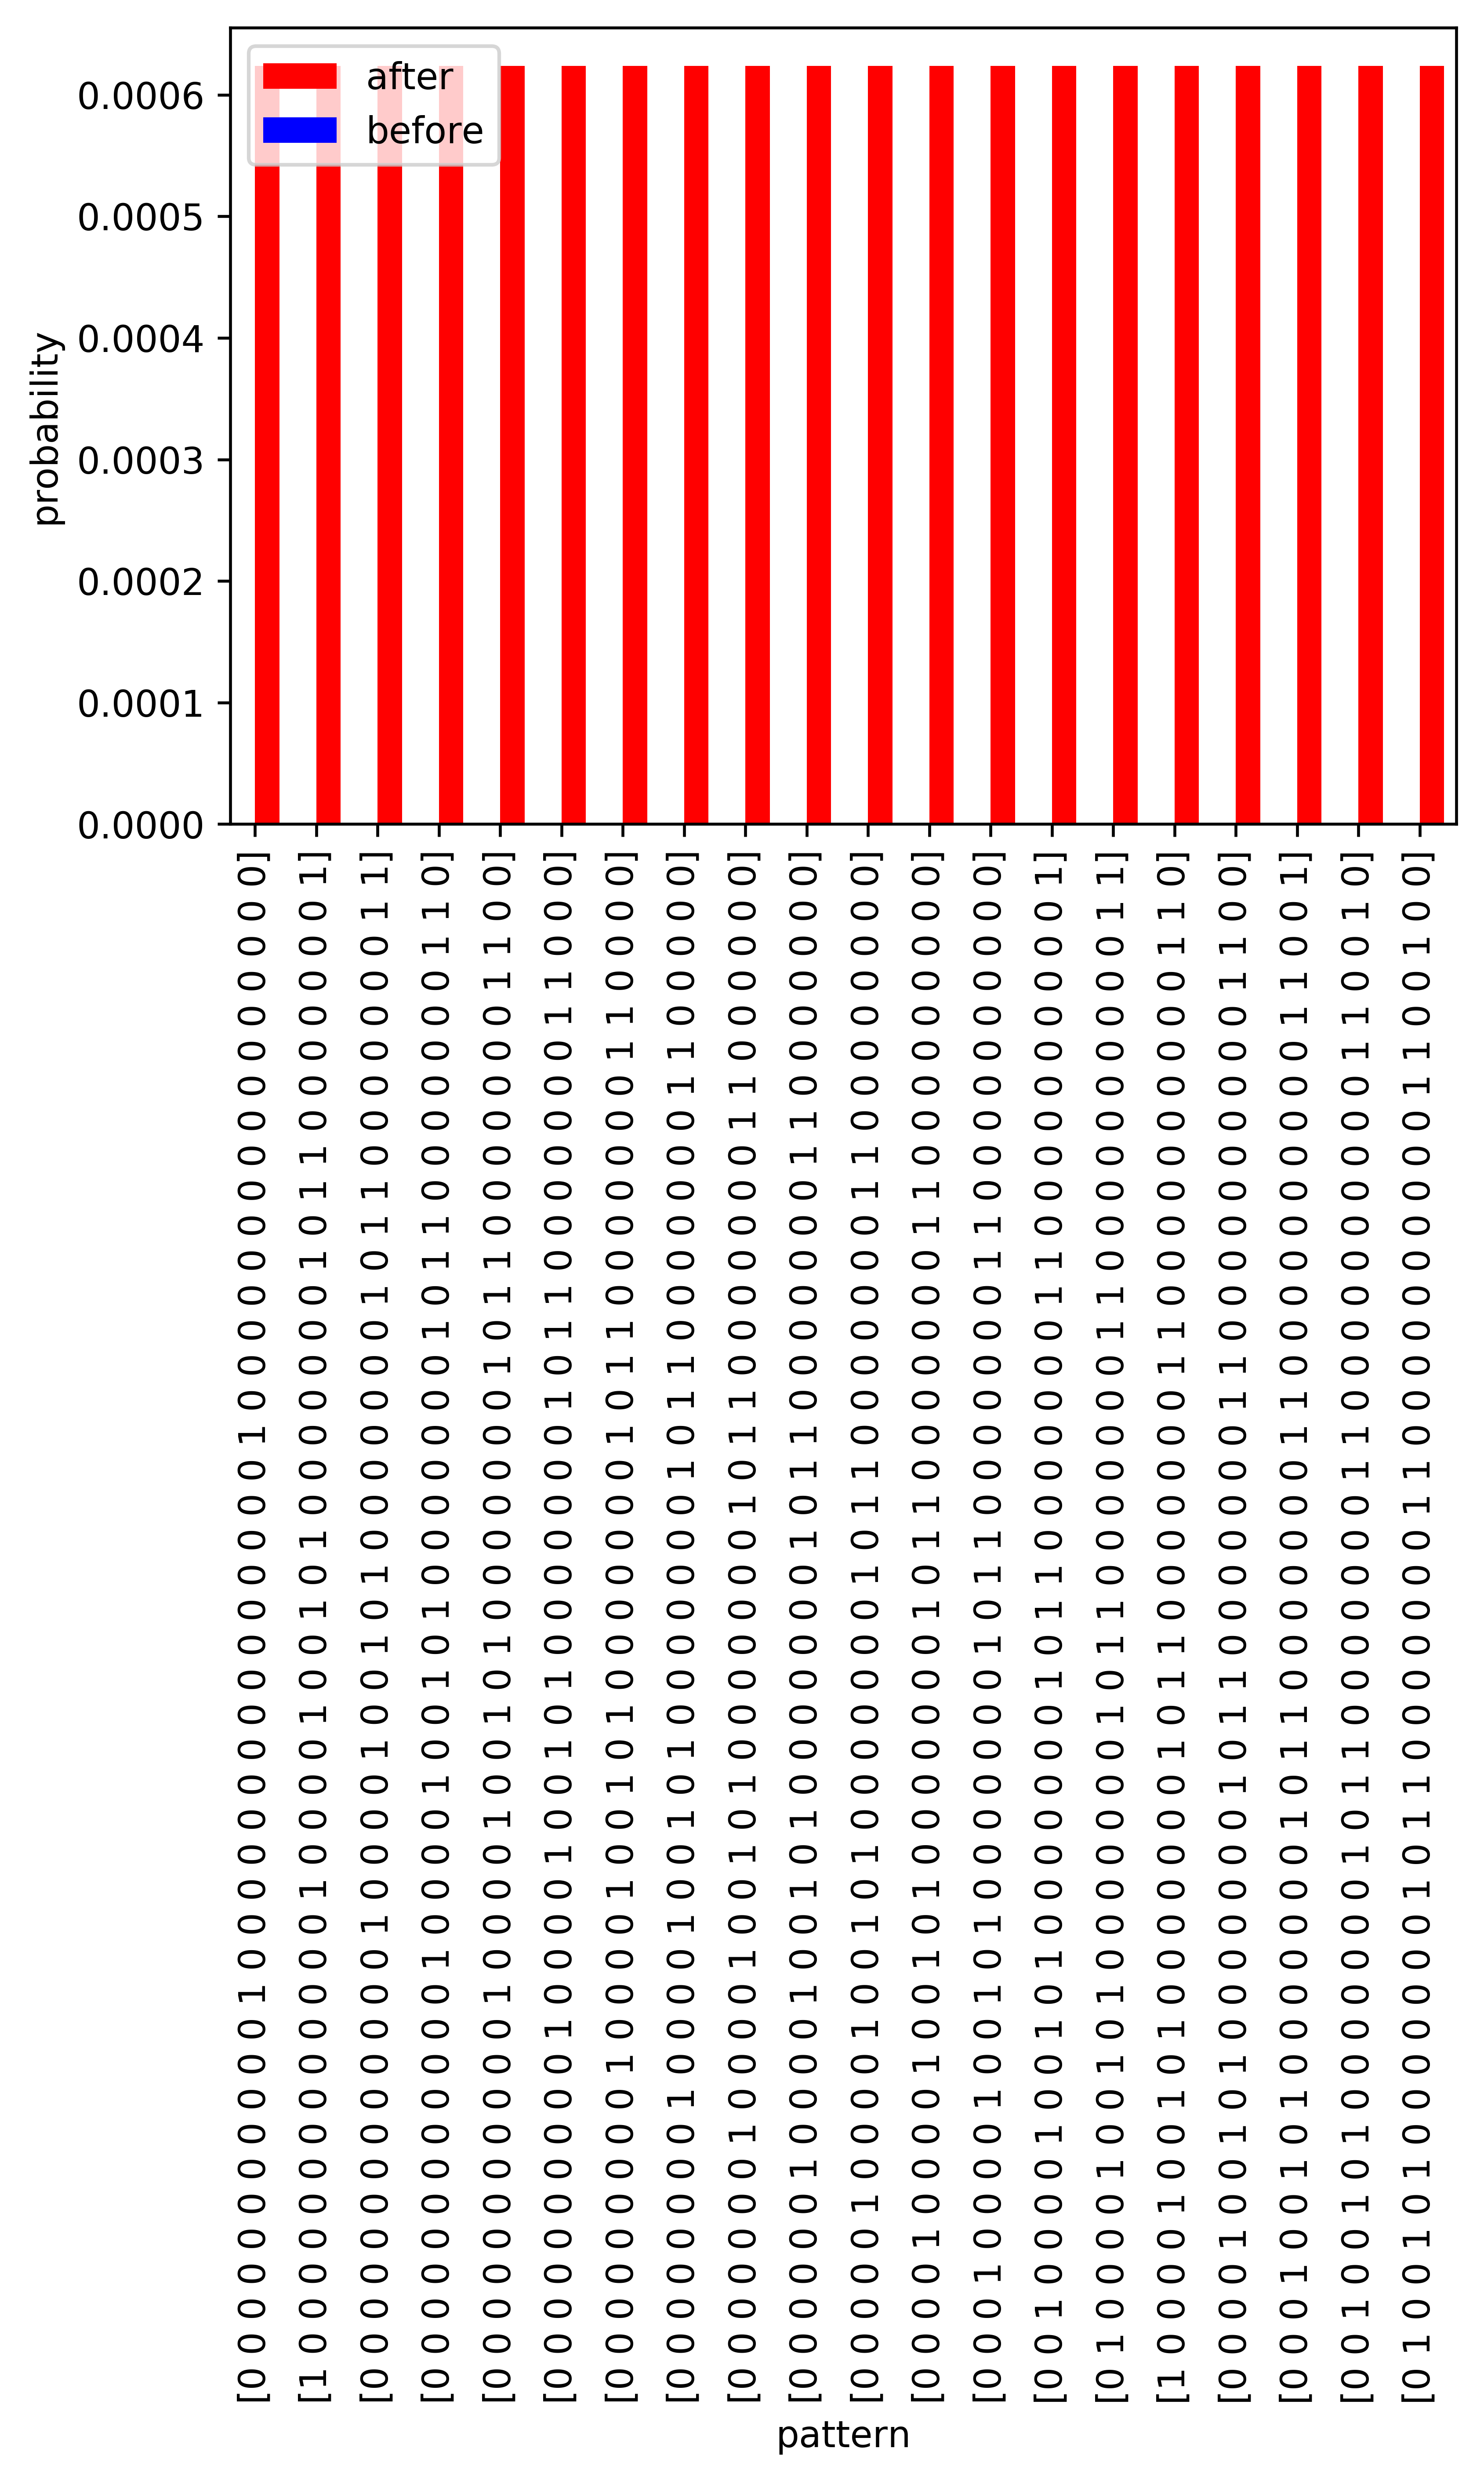

In [118]:
#   print(print_pattern)
#グラフ出力
#パターンの確率比較
fig = plt.figure(dpi=600)
ax = fig.gca()
x = np.arange(len(print_pattern))
w = 0.4
#max_print = 20

plt.bar(x+w, print_probability1, width=w, color="red", label="after")
plt.bar(x, print_probability2, width=w, color="blue", label="before")
plt.xlim(-(w/2), max_print-(w/2))
plt.xlabel("pattern")
plt.ylabel("probability")
plt.xticks(x + w/2, print_pattern)
ax.set_xticklabels(print_pattern, rotation=90)
plt.legend()
plt.plot()
#plt.savefig(str(time_leng) + "-" + str(pattern_leng) + ".png", bbox_inches='tight')
#plt.close()


In [3]:
# Kullback-Divergence の計算
#引数一覧
# 1 : 経験後ファイル名
# 2 : 経験前ファイル名
# 3 : 計算する最小のウィンドウサイズ(ステップ数)
# 4 : 計算する最大のウィンドウサイズ(ステップ数)
# 5 : 計算する最小のパターン長
# 6 : 計算する最大のパターン長
# 7 : ウィンドウサイズとパターン長に対する刻み幅


# divergence.txt に各ウィンドウサイズ, パターン長の divergence を出力
# data-ab.txt に経験前後に観察されたパターンの数と1回あたりの確率を出力
# count.txt に各ウィンドウサイズ, パターン長におけるパターンとその確率を出力

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

#ファイルの読み込み
#file_name1 = sys.argv[1]
#file_name2 = sys.argv[2]
#file1 = pd.ExcelFile(file_name1+'.xlsx')
#file2 = pd.ExcelFile(file_name2+'.xlsx')

#file1 = pd.ExcelFile(sys.argv[1])
#file2 = pd.ExcelFile(sys.argv[2])
file1 = pd.ExcelFile("../../maleB30data/B30-male-R3.xlsx")
file2 = pd.ExcelFile("../../maleB30data/B30-male-R2.xlsx")

sheet_df1 = file1.parse(file1.sheet_names, header=None, index_col=0)
sheet_df2 = file2.parse(file2.sheet_names, header=None, index_col=0)

#cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

cannel_start = 10
cannel_end = 5

def inspect(time_leng, pattern_leng, count_data):
    #ファイル1のデータカウント
    pattern_dict1 = {}
    sumpsth = 0
    for i, name in enumerate(sheet_names1):
        sheet_df1[i] = file1.parse(name)
        #print(sheet_df1[i].columns[0], i)
        #print(sheet_df1[i][1][1])
        try: 
            start_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][0]) + cannel_start
            end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1]) - cannel_end
            sig1 = (sheet_df1[i]['Unnamed: 3'][start_number : end_number]).values
        except KeyError:
            print(name)        
            break
        sig1 = sig1.astype("int")
        #print(len(sig1))
        sig1 = np.trim_zeros(sig1)
    #        print()
        leng = len(sig1)
        psth = np.zeros(int((leng/time_leng)+1), dtype=np.int)
        l = 0
        for k in range(0, leng, time_leng) :
            psth[l] = sig1[k : k+time_leng].sum()
            l += 1
    #        print(sig1[len(psth)-1])
        if(len(psth) > pattern_leng) : 
            for k in range(len(psth) - pattern_leng +1) :   # PSTHデータからはパターンを重ねて検索している
                if (str(psth[k : k + pattern_leng]) in pattern_dict1) : 
                    pattern_dict1[str(psth[k : k + pattern_leng])] += 1
                else : 
                    pattern_dict1[str(psth[k : k + pattern_leng])] = 1
            sumpsth += (len(psth) -pattern_leng+1)

#    print()
#    print(sumpsth)

    #ファイル2のデータカウント
    pattern_dict2 = {}
    sum_dict = pattern_dict1.copy()
    for i, name in enumerate(sheet_names2):
        sheet_df2[i] = file2.parse(name)
        try: 
            start_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][0]) + cannel_start
            end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1]) - cannel_end
            sig1 = (sheet_df2[i]['Unnamed: 3'][start_number : end_number]).values
        except KeyError:
            print(name)        
            break            
        sig1 = sig1.astype("int")
        sig1 = np.trim_zeros(sig1)
        leng = len(sig1)
#        print(sig1[0])
        psth = np.zeros(int((leng/time_leng)+1), dtype=np.int)
        l = 0
        for k in range(j, leng, time_leng) :
            psth[l] = sig1[k+j : k+j+time_leng].sum()
            l += 1
        if(len(psth) > pattern_leng) : 
            for k in range(len(psth) - pattern_leng +1) :
                if (str(psth[k : k+ pattern_leng]) in pattern_dict2) : 
                    pattern_dict2[str(psth[k : k+ pattern_leng])] += 1
                    sum_dict[str(psth[k : k+ pattern_leng])] += 1
                else : 
                    pattern_dict2[str(psth[k : k+ pattern_leng])] = 1
                    if (str(psth[k : k+ pattern_leng]) in sum_dict) : 
                        sum_dict[str(psth[k : k+ pattern_leng])] += 1
                    else :
                        sum_dict[str(psth[k : k+ pattern_leng])] = 1


                            
    #情報量の計算準備
    pattern_information =  0.0
#    print()
#    print()
#    print(sum(pattern_dict1.values()))
#    print(sum(sum_dict.values()))
#    print()
    sum_pattern1 = sum(pattern_dict1.values()) + len(sum_dict.keys())
    sum_pattern2 = sum(pattern_dict2.values()) + len(sum_dict.keys())
    if(len(pattern_dict1.keys()) == 0 ):
        del pattern_dict1, sum_dict, leng, psth, start_number, end_number, sig1, i, l, k, sum_pattern1
        if(len(pattern_dict2.keys()) == 0 ):
            return 0, 0, 0
        else :
            return 0, 0, sum_pattern2
    elif(len(pattern_dict2.keys()) == 0 ):
        del pattern_dict2, sum_dict, leng, psth, start_number, end_number, sig1, i, l, k, sum_pattern2
        return 0, sum_pattern1, 0

#    print(sum_pattern1)
#    print(sum_pattern2)
#    sum_pattern = sum(sum_dict.values()) 
    pattern1 = len(pattern_dict1.keys())
    probability1 = np.zeros(pattern1, float)
    probability2 = np.zeros(pattern1, float)
    top_dict = {}
    k = 0
    for i in (pattern_dict1.keys()) :
        probability1[k] = ((pattern_dict1[i]) / sum_pattern1)
        if(i in pattern_dict2) : 
            probability2[k] = ((pattern_dict2[i]+1) / sum_pattern2)
        else :
            probability2[k] = (1 / sum_pattern2)
        info = probability1[k] * math.log2(probability1[k]/probability2[k])
        pattern_information += info
        top_dict[i] = info
#        print(i)
        k += 1



    
    #グラフ出力の準備
#    print_probability1 = np.zeros(max_print, float)
#    print_probability2 = np.zeros(max_print, float)
#    print_count1 = np.zeros(max_print, float)
#    print_count2 = np.zeros(max_print, float)
#    print_kullback = np.zeros(max_print, float)
#    print_pattern = []
    k = 0
    #print(time_leng, pattern_leng, sum_pattern1, sum_pattern2, file=count_data)
    for i, v in sorted(top_dict.items(), key=lambda x:-x[1]) :
        print_probability1 = ((pattern_dict1[i]) / sum_pattern1)
        if(i in pattern_dict2) : 
            print_probability2 = ((pattern_dict2[i]+1) / sum_pattern2)
        else :
            print_probability2 = (1 / sum_pattern2)
            pattern_dict2[i] = 0
#        print(type(i))
        print(time_leng, pattern_leng, str(i), pattern_dict1[i], pattern_dict2[i], print_probability1, print_probability2, top_dict[i], file=count_data)
#        print_pattern.append(i)
        k += 1
#        print(i)
#        print_probability2[k] = (pattern_dict2[i]+1 / sum_pattern2)

        
    del pattern_dict1, pattern_dict2, sum_dict, probability1, probability2, top_dict#, print_pattern
#    print("", file=count_data)
    return pattern_information, sum_pattern1, sum_pattern2

parameter1_start = 1#int(sys.argv[3])
parameter1_end = 51#int(sys.argv[4])

parameter2_start = 1#int(sys.argv[5])
parameter2_end = 10#int(sys.argv[6])

step = 1#int(sys.argv[7])


#file_kull = open("kullback-t" + sys.argv[3] + sys.argv[4] + "p" + sys.argv[5] + sys.argv[6] + "s" + sys.argv[7] +".txt", "w")
file_kull = open("divergence.txt", "a")
file_data = open("data-ab.txt", "a")

for i in range(parameter1_start, parameter1_end+1, step):
    for j in range(parameter2_start, parameter2_end+1, step):
#        kullback[i-1][j-1] = inspect(i, j, 20)
        count_data = open("count_data.txt", "a")
        pattern_information, sum_pattern1, sum_pattern2 = inspect(i, j, count_data)
        print(i, j, pattern_information, file=file_kull)
        if(sum_pattern1 == 0) :
            if(sum_pattern2 == 0) : 
                print(i, j, 0, 0, 0, 0, file=file_data)
            else : 
                print(i, j, 0, 0, sum_pattern2, 1/sum_pattern2, file=file_data)
        elif(sum_pattern2 == 0) :
            print(i, j, sum_pattern1, 1/sum_pattern1, 0, 0, file=file_data)
        else :
            print(i, j, sum_pattern1, 1/sum_pattern1, sum_pattern2, 1/sum_pattern2, file=file_data)
        count_data.close()
    print("", file=file_kull)
    print("", file=file_data)
    print("end"+str(i))
#np.savetxt("kullback-t1-" + sys.argv[3] +"-p1-"+ sys.argv[4] +".txt", kullback)
file_kull.close()
file_data.close()

Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end1
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end2
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end3
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end4
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end5
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end6
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end7
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end8
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end9
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end10
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
end11
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26
Sheet26